<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab4/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

##Определение кластеризации

###Теория

Кластеризация данных - это метод машинного обучения, который позволяет автоматически разделить множество данных на группы, называемые кластерами. Кластеризация выполняется на основе схожести между данными, так что объекты внутри одного кластера более похожи друг на друга, чем на объекты из других кластеров. Целью кластеризации является выявление структуры в данных, где объекты внутри одного кластера имеют общие характеристики, а объекты между разными кластерами различаются.
В задаче кластеризации, как и в задаче классификации, мы тоже разбиваем объекты на конечное множество классов, но у нас нет ни обучающей выборки, ни понимания, какой будет природа этих классов. То, что модель кластеризации какие-то объекты сочла «похожими», отнеся к одному классу, будет новой информацией, «открытием», сделанным этой моделью. Обучающей выборки у нас также не будет: ведь мы не знаем заранее, что за классы получатся (а иногда и сколько их будет). Таким образом, кластеризация — это задача обучения без учителя. Из-за общего сходства постановок задач в литературе кластеризацию иногда называют unsupervised classification.

Примеры задач, в которых кластеризация может быть полезной:

* Сегментация рынка: В маркетинге кластеризация покупателей помогает выявить группы схожих потребителей, что позволяет компаниям создавать более точные маркетинговые стратегии для каждой группы.

* Медицинская диагностика: Кластеризация медицинских данных, таких как результаты анализов, может помочь выявить группы пациентов с похожими медицинскими характеристиками для более эффективного лечения.

* Рекомендательные системы: Кластеризация пользователей на основе их предпочтений может использоваться для рекомендации продуктов, фильмов или музыки, которые могут быть интересны определенной группе пользователей.

* Детекция аномалий: Кластеризация может выявлять аномалии в данных, идентифицируя объекты, которые не подходят ни в один кластер.

* Биологическое моделирование: В биологии кластеризация может использоваться для группировки генов с похожими функциональными характеристиками.

###Пример

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/fortnite_statistics.csv")
df

,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,4/10,6:00 PM,27,sober,2,0,0,23%,14,2,271.08,20,20,272,331,621
1,4/10,6:00 PM,45,sober,1,2,0,30%,19,1,396.73,123,30,247,444,998
2,4/10,6:00 PM,38,high,3,0,0,30%,32,1,607.80,71,60,176,322,1109
3,4/10,7:00 PM,30,high,1,3,0,18%,19,1,714.16,244,10,238,330,4726
4,4/10,7:00 PM,16,high,3,1,1,58%,42,18,1140.00,584,150,365,668,2070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,17-Apr,12:00 AM,2,high,8,2,0,31%,97,8,3770.00,1750,400,576,1492,4593
83,17-Apr,12:00 AM,24,high,4,0,0,20%,12,4,222.54,94,0,96,478,2262
84,17-Apr,1:00 PM,30,sober,1,2,0,28%,40,4,267.00,78,30,148,375,1196
85,17-Apr,2:00 PM,18,sober,3,2,1,26%,25,3,954.43,370,60,354,475,1168


Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

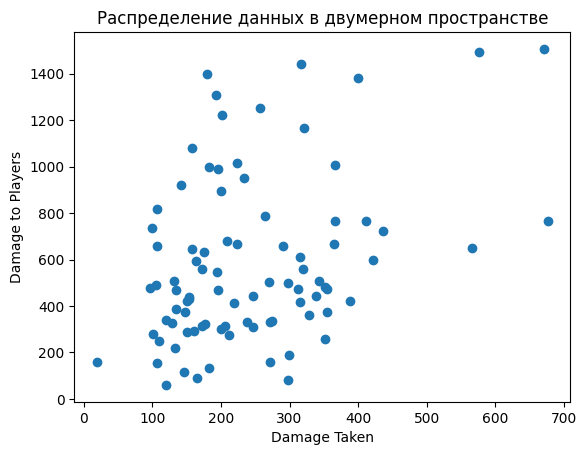

In [2]:
plt.scatter(df["Damage Taken"], df["Damage to Players"])
plt.xlabel('Damage Taken')
plt.ylabel('Damage to Players')
plt.title('Распределение данных в двумерном пространстве')

In [3]:
X = df[["Damage Taken", "Damage to Players"]]
X

,Damage Taken,Damage to Players
0,272,331
1,247,444
2,176,322
3,238,330
4,365,668
...,...,...
82,576,1492
83,96,478
84,148,375
85,354,475


In [4]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=2)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
print(cluster_centers) # центры кластеров в двумерном пространстве

[[ 221.3125      405.65625   ]
 [ 307.7826087  1071.82608696]]


In [6]:
print(cluster_labels) #  центры кластеров в двумерном пространстве

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 1 0 1 1 0 0 0 0]


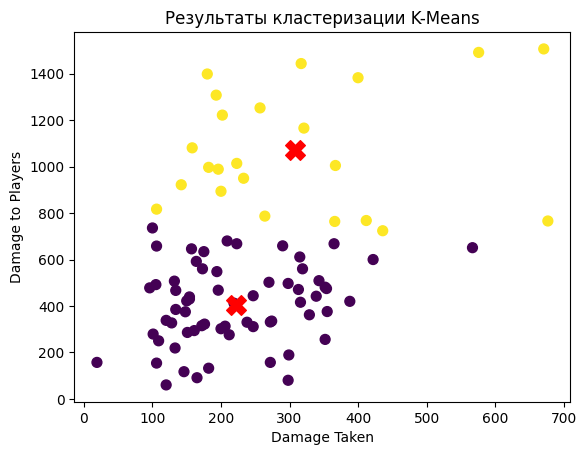

In [7]:
# Визуализируем результаты кластеризации двумерной кластеризации
plt.scatter(df["Damage Taken"], df["Damage to Players"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Damage Taken')
plt.ylabel('Damage to Players')
plt.title('Результаты кластеризации K-Means')
plt.show()

##Методы кластеризации

###Теория. K-means

K-Means (К-средних):

K-Means - это один из самых известных и широко используемых методов кластеризации. Его основной принцип заключается в следующих шагах:

1. Инициализация центров кластеров: Начинаем с выбора K начальных центров кластеров случайным образом.

2. Присвоение кластера: Каждая точка данных присваивается к ближайшему центру кластера.

3. Пересчет центров кластеров: После присвоения точек кластерам пересчитываются центры кластеров путем нахождения среднего значения точек в каждом кластере.

4. Повторение: Шаги 2 и 3 выполняются итеративно до тех пор, пока центры кластеров не перестанут значительно меняться или достигнут предопределенного критерия остановки (максимальное число итераций).

Преимущества K-Means включают простоту и быстроту работы. Однако он чувствителен к начальной инициализации и может сойтись к локальному минимуму.

[Почитать подробнее](https://dzen.ru/a/X9n-C-eukz4e7u7F)

###Пример. K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


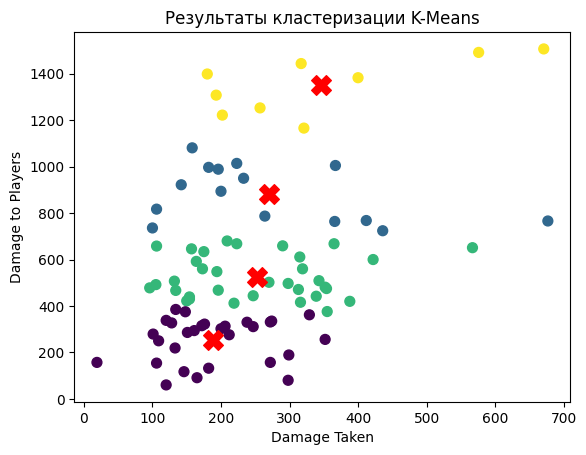

In [8]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=4)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
# Визуализируем результаты кластеризации
plt.scatter(df["Damage Taken"], df["Damage to Players"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Damage Taken')
plt.ylabel('Damage to Players')
plt.title('Результаты кластеризации K-Means')
plt.show()

###Теория. DBSCAN


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это метод кластеризации, который группирует объекты на основе плотности распределения точек в пространстве признаков. Алгоритм работает на основе двух ключевых параметров:

**eps**: радиус окрестности вокруг каждого объекта.

**min_samples**: минимальное количество объектов, которое должно находиться в окрестности радиуса eps, чтобы считать эту область "плотно заселенной" (количество точек с радиусов eps содержит min_samples).

Алгоритм работы:
1. Инициализация: В начале все объекты данных помечаются как необработанные.

Выбор точки для анализа: Алгоритм выбирает одну из необработанных точек и переводит её статус в "обработанную".

2. Определение соседей: Алгоритм ищет все объекты в радиусе eps от выбранной точки.

3. Анализ плотности: Если в окрестности находится min_samples или больше объектов, то текущая точка становится первой точкой нового кластера. В противном случае, точка помечается как выброс (калстер с ```label = -1```) (но в дальнейшем может быть включена в кластер).

4. Расширение кластера: Если найдена "плотно заселённая" область, алгоритм присваивает всем соседним объектам этой точки тот же кластер. Затем, для каждой из этих точек, рекурсивно ищутся их соседи, и при соответствии условиям плотности, эти новые точки также присоединяются к кластеру.

5. Переход к следующей точке: После полного анализа текущего кластера, алгоритм выбирает следующую необработанную точку и повторяет процесс начиная с шага 2.

6. Завершение работы: Алгоритм завершает свою работу, когда все точки будут обработаны. Точки, которые не могут быть отнесены ни к одному кластеру, остаются помеченными как выбросы.

Этот алгоритм эффективен для выявления кластеров произвольной формы и устойчив к наличию выбросов в данных.


[Почитать](https://cartetika.ru/tpost/k05o2ndpf1-klasterizatsiya-prostranstvennih-dannih)

###Пример. DBSCAN

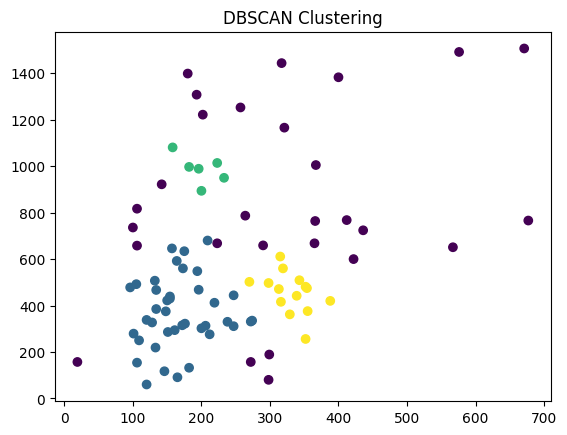

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

###Теория. Иерархическая кластеризация

Иерархическая кластеризация — это метод группировки данных, который формирует структуру в виде дерева или дендрограммы. Вот его основные шаги:

1. Стартовая точка: Изначально каждый элемент данных считается своим собственным кластером.

2. Слияние кластеров: На каждом этапе метода два наиболее близких кластера сливаются в один. "Близость" определяется на основе выбранной метрики расстояния, такой как евклидово расстояние.

3. Формирование дендрограммы: Процесс слияния продолжается до тех пор, пока не останется один общий кластер или пока не будет достигнуто заданное количество кластеров. При этом на каждом этапе слияния строится уровень дендрограммы.

4. Анализ результатов: Полученная дендрограмма представляет собой иерархию кластеров на различных уровнях "глубины", что позволяет анализировать структуру данных с разной степенью детализации.

Этот метод хорошо подходит для задач, где нужно изучить данные на множестве уровней группировки или когда неизвестно оптимальное число кластеров.

[Почитать подробнее](https://cartetika.ru/tpost/uun5jy5tk1-klasterizatsiya-prostranstvennih-dannih)

###Пример. Иерархическая кластеризация

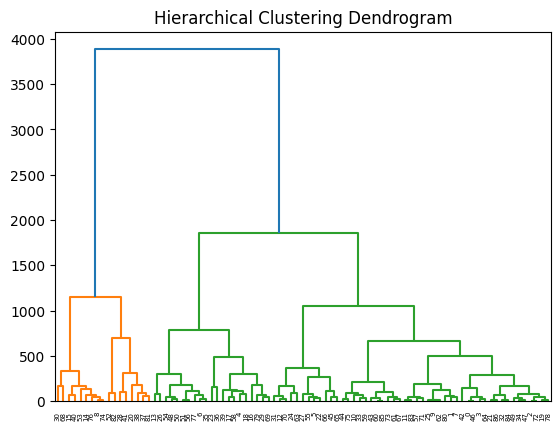

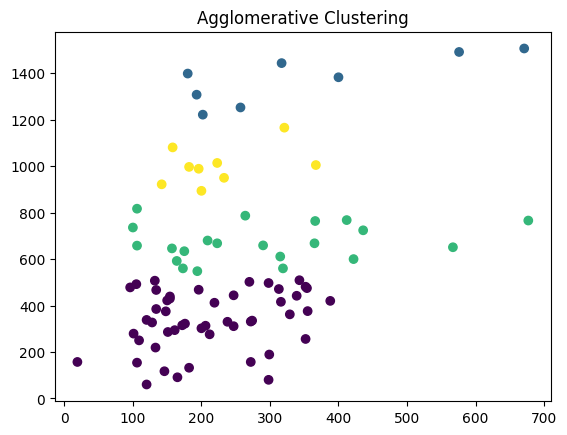

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

# Визуализация дендрограммы
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


##Метрики качества кластеризации

###Теория

Метрики качества кластеризации - это показатели, которые используются для оценки качества кластеризации данных, то есть для измерения того, насколько хорошо объекты были разделены на кластеры. Они помогают оценить, насколько кластеризация соответствует структуре данных и насколько кластеры компактны и однородны.

Вот некоторые из наиболее распространенных метрик качества кластеризации:

### 1. Silhouette Score

- **Описание**: Измеряет схожесть объекта с объектами в своём кластере относительно ближайшего кластера. Значения варьируются от -1 до 1.
- **Упрощенное описание**: Смотрит, насколько точки в одной группе ближе к себе, чем к точкам в других группах.
- **Пример**: Если все шарики одного цвета находятся рядом, а между группами шариков разных цветов есть расстояние, Silhouette Score высок.
- **Диапозон**: от -1 до 1. Чем ближе к 1, тем лучше.

Подходит для большинства методов, включая методы, основанные на количестве точек (K-means, Agglomerative Clustering) и плотности (DBSCAN).

### 2. Calinski-Harabasz Index

- **Описание**: Оценка соотношения межкластерной и внутрикластерной дисперсии.
- **Упрощенное описание**: Смотрит, насколько группы отличаются друг от друга и насколько однородны внутри.
- **Пример**: Если в одной корзине только яблоки, а в другой только груши, и они не перемешаны, индекс высок.
- **Диапозон**: Эвристичен, чем больше, тем лучше.

Обычно применяется в методах, где число кластеров задано заранее, например, в K-means или Agglomerative Clustering.

### 3. Davies-Bouldin Index

- **Описание**: Оценивает среднюю "схожесть" каждого кластера с наиболее похожим на него кластером.
- **Упрощенное описание**: Проверяет, насколько каждая группа отличается от самой похожей на неё группы.
- **Пример**: Если каждая группа атлетов в спортзале отделена от других, индекс низкий.
- **Диапозон**: Эвристичен, чем меньше, тем лучше.

Хорошо работает с методами, где число кластеров неизвестно заранее, такими как DBSCAN.

### 4. Normalized Mutual Information (NMI)

- **Описание**: Оценивает сходство между кластеризацией и исходными данными, учитывая случайные факторы.
- **Упрощенное описание**: Как ARI, но учитывает случайные совпадения.
- **Пример**: Если в группах по интересам есть небольшие пересечения, NMI учтет это как "шум" и все равно даст высокую оценку, если большинство совпадает.
- **Диапозон**: от 0 до 1. Чем ближе к 1, тем лучше.

Хорошо подходит для случаев, когда исходное разбиение на кластеры уже существует (K-means)


И это не все метрики! Более детально - [https://academy.yandex.ru/handbook/ml/article/klasterizaciya](https://academy.yandex.ru/handbook/ml/article/klasterizaciya)

###Примеры

#### 1. Silhouette Score

С помощью метода силуэта, мы можем посмотреть оптимальное количество кластеров (как видно из картинки ниже, оптимальное количество = 4 с баллом 0.44. Вероятно эксперемент не удался, так как ниже 0.5 и не стоит брать в счет).

Это может говорить о том, что данные не оптимальны для кластеризации.

Оптимальное число кластеров 4, с баллом 0.44940329181916583


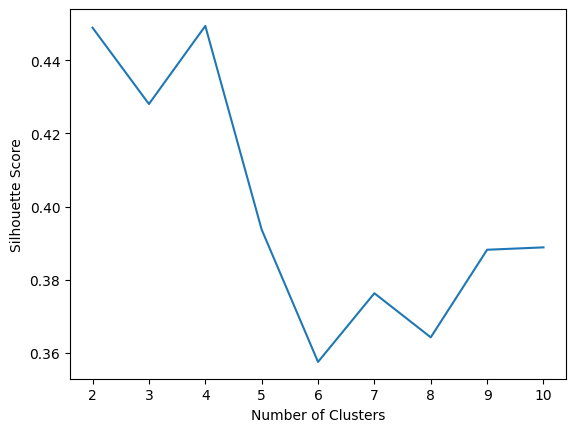

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Поиск оптимального K
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### 2. Calinski-Harabasz Index

Значение индекса Calinski-Harabasz около 59 говорит о том, что разделение на два кластера является относительно хорошим с точки зрения этой метрики. Чем выше этот индекс, тем лучше кластеризация. Однако абсолютное значение этого индекса трудно интерпретировать.

Оптимальное число кластеров = 10

Оптимальное число кластеров 10, с баллом 96.19987465944538


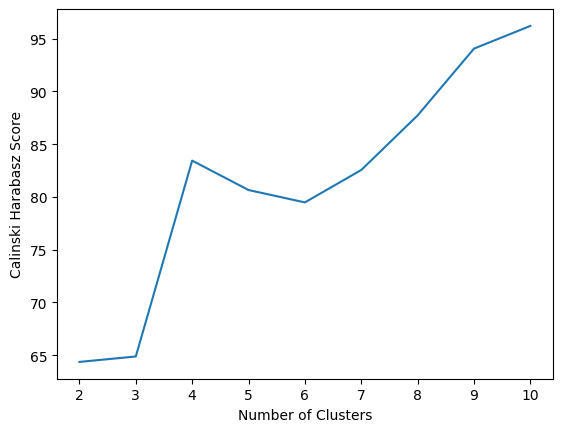

In [13]:
from sklearn.metrics import calinski_harabasz_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    scores.append(score)

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()


#### 3. Davies-Bouldin Index

Проверим методом davis_bouldin_score.

Как видим, алгоритм считает 10 - оптимальным числом кластеров. Метрика считается эврестичной, чем меньше - тем лучше!

Оптимальное число кластеров 10, с баллом 0.6868918806497122


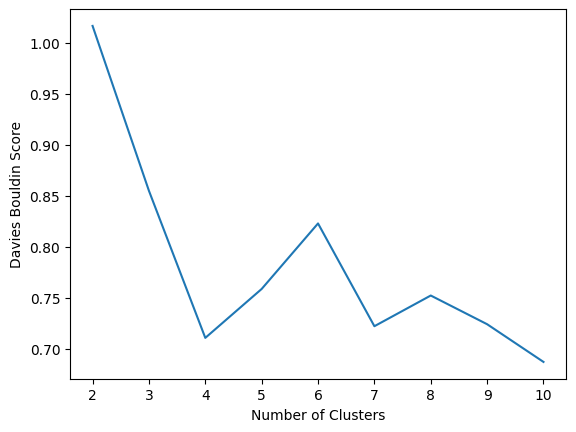

In [14]:
from sklearn.metrics import davies_bouldin_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = davies_bouldin_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(min(scores)) + 2}, с баллом {min(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

In [15]:
df['Mental State'].unique() # Предположим, что ментальное состояние будет истинными метками классов, по которому мы хотим найти оптимальное число кластеров

array(['sober', 'high'], dtype=object)

#### 4. Normalized Mutual Information (NMI)

На графике мы видим, что алгоритм посчитал оптимальным числом - 5, с баллом 0.03.
Данное состояние свидетльствует только о том, что эксперемент не удался, метрика в диапозоне [0;1], получилось сильно близко к 0, поэтому можно сказать, что эксперемент не удался.

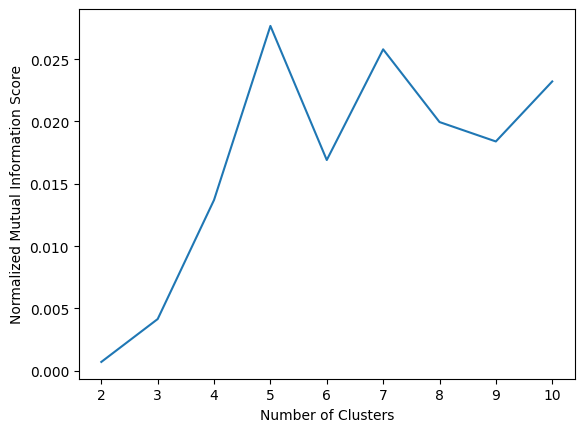

Оптимальное число кластеров 5, с баллом 0.027666825879632775


In [16]:
from sklearn.metrics import normalized_mutual_info_score

# Предположим, что y_true - это истинные метки
y_true = df['Mental State'].to_numpy()
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = normalized_mutual_info_score(y_true, kmeans.labels_, average_method='arithmetic')
    scores.append(score)

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Normalized Mutual Information Score')
plt.show()

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(X_scaled):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(X_scaled) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

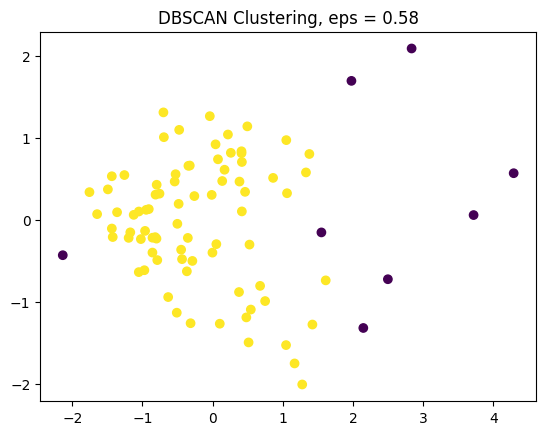

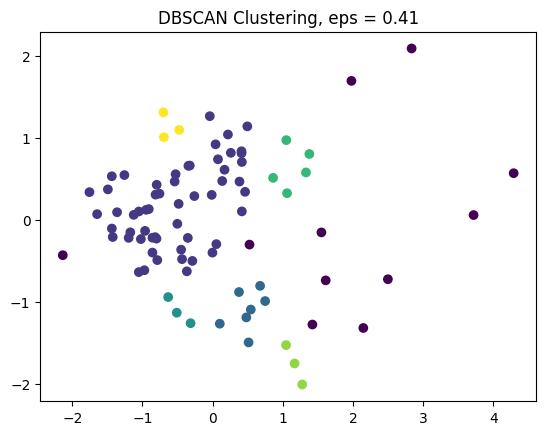

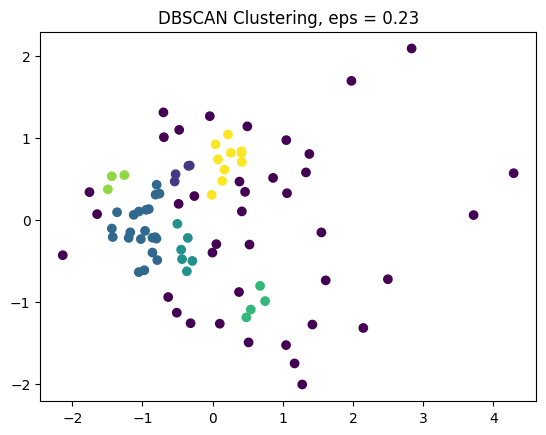

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

for eps in [np.mean(neighbours) + np.std(neighbours) / 2, np.mean(neighbours), np.mean(neighbours) - np.std(neighbours) / 2]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(X_scaled)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [ ]:
!pip install ydata-profiling

In [29]:
# А теперь выполним профилирование!
# Либа на гитхабе с докой https://github.com/ydataai/ydata-profiling

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

(0, 1, 2, 3, 4, 5, -1)


In [30]:
ProfileReport(df[df.dbscan_labels == 0])

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Визуализация многомерных кластеров

###Теория

Визуализация кластеров - важный шаг в анализе результатов кластеризации, который может помочь вам лучше понять структуру данных и эффективность вашего метода кластеризации. Давайте рассмотрим два популярных метода визуализации: использование PCA (Principal Component Analysis) и t-SNE (t-distributed Stochastic Neighbor Embedding).

PCA - это метод снижения размерности данных. Он позволяет вам представить данные в меньшей размерности, сохраняя при этом максимальное количество дисперсии. Это удобно для визуализации, потому что вы можете уменьшить данные до двух или трех измерений и визуализировать их на плоскости. Для визуализации кластеров с PCA, сначала снизьте размерность данных до двух или трех компонент. Затем используйте диаграмму рассеяния (scatter plot), где каждый кластер будет представлен уникальным цветом или маркером.

T-SNE - это метод визуализации, который позволяет представить данные в низкоразмерном пространстве так, чтобы близкие объекты в исходных данных оставались близкими, а далекие объекты оставались далекими.
Для визуализации кластеров с t-SNE, сначала снизьте размерность данных до двух компонент, а затем создайте диаграмму рассеяния, подобную PCA.

###Пример

In [31]:
x1 = df["Damage Taken"]
x2 = df["Damage to Players"]
x3 = df["Damage to Structures"]
x = np.array([[i, j, k] for i, j, k in zip(x1, x2, x3)])
x = StandardScaler().fit_transform(x)
x[:5]

array([[ 0.22402345, -0.71214999, -0.74155598],
       [ 0.02276323, -0.39124672, -0.63191856],
       [-0.54881581, -0.73770865, -0.59963804],
       [-0.04969046, -0.71498984,  0.45224141],
       [ 0.97271148,  0.2448801 , -0.3201644 ]])

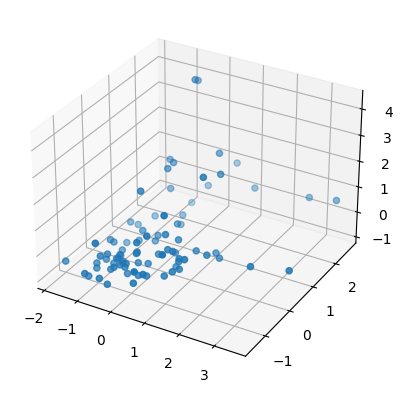

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2])

Text(0.5, 1.0, 'Результат PCA (2 компоненты)')

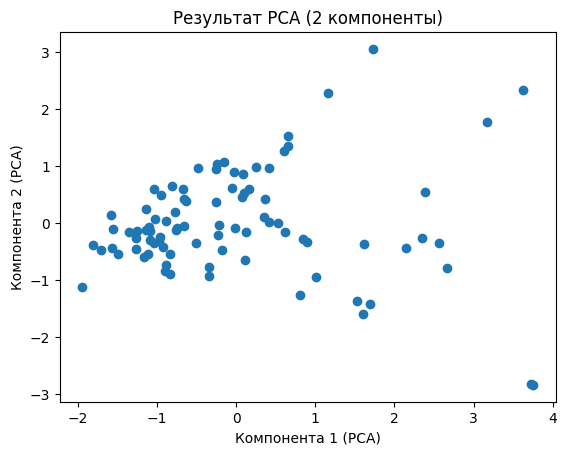

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Создаем объект PCA и снижаем размерность до 2 компонент
pca = PCA(n_components=2)
data_pca = pca.fit_transform(x)

# Восстановим данные обратно в исходное пространство (для демонстрации)
data_restored = pca.inverse_transform(data_pca)
plt.scatter(data_pca[:,0], data_pca[:,1])
plt.xlabel('Компонента 1 (PCA)')
plt.ylabel('Компонента 2 (PCA)')
plt.title('Результат PCA (2 компоненты)')

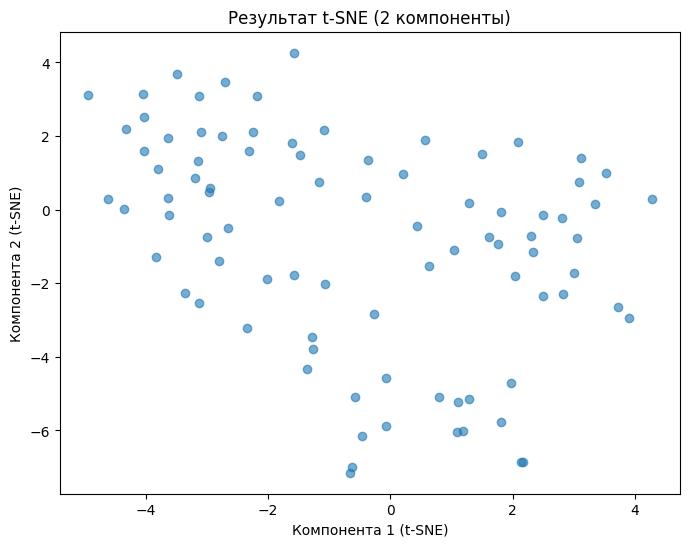

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Создаем объект t-SNE и снижаем размерность до 2 компонент
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(x)

# Визуализируем данные после применения t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.6)
plt.xlabel('Компонента 1 (t-SNE)')
plt.ylabel('Компонента 2 (t-SNE)')
plt.title('Результат t-SNE (2 компоненты)')
plt.show()


#Полезные ссылки
[Кластеризация](https://academy.yandex.ru/handbook/ml/article/klasterizaciya)

[Интерактивная кластеризация](http://alekseynp.com/viz/k-means.html)